In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import requests
import json
import scipy.stats as st

# import and subset mental health data

In [71]:
df=pd.read_csv("data_resources/2020IndicatorsofDepression.csv")
df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,July 16 - July 21,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,July 16 - July 21,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,July 16 - July 21,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,July 16 - July 21,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1


The r-squared is: 0.07671689417201501


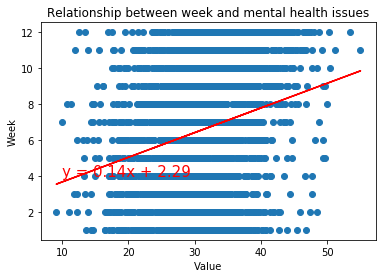

There is a strong positive correlation mental health issues and increase in week


In [72]:
st.linregress(df["Value"],df["Week"])

x_values = df["Value"]
y_values = df["Week"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")
plt.xlabel('Value')
plt.ylabel('Week')
plt.title("Relationship between week and mental health issues")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
%matplotlib inline
print(f"There is a strong positive correlation mental health issues and increase in week")

In [73]:
# us_state_abbrev["Georgia"] # "GA"
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [74]:
# Convert string column to numeric
df["Indicator_Num"]=df["Indicator"].mask(df["Indicator"]=="Symptoms of Depressive Disorder",1) 
df["Indicator_Num"]=df["Indicator_Num"].mask(df["Indicator_Num"]=="Symptoms of Anxiety Disorder",2)
df["Indicator_Num"]=df["Indicator_Num"].mask(df["Indicator_Num"]=="Symptoms of Anxiety Disorder or Depressive Disorder",3)
df["Indicator_Num"].unique()

array([1, 2, 3], dtype=object)

In [75]:
df.head()

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN,1
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN,1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN,1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN,1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN,1


In [76]:
group_df=df[["Group"]]
df.Group.unique()

array(['National Estimate', 'By Age', 'By Gender',
       'By Race/Hispanic ethnicity', 'By Education', 'By State'],
      dtype=object)

In [97]:
age_df = df.loc[(df['Group']=="By Age")]
print(len(age_df))
age_df

252


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN,1
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN,1
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN,1
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN,1
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,Apr 23 - May 5,18.4,17.0,19.7,17.0 - 19.7,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2453,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,12,July 16 - July 21,44.5,42.4,46.5,42.4 - 46.5,NaN,3
2454,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,12,July 16 - July 21,40.0,38.2,41.9,38.2 - 41.9,NaN,3
2455,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,60 - 69 years,12,July 16 - July 21,32.1,30.3,34.0,30.3 - 34.0,NaN,3
2456,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,70 - 79 years,12,July 16 - July 21,24.3,21.9,26.8,21.9 - 26.8,NaN,3


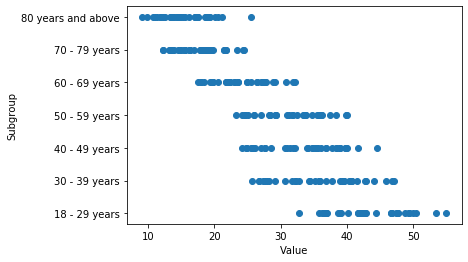

In [108]:
plt.scatter(age_df.iloc[:,6],age_df.iloc[:,3])
plt.xlabel("Value")
plt.ylabel("Subgroup")
plt.show()


In [77]:
state_df = df.loc[(df['Group']=="By State") & (df['Week'] == 12)]
print(len(state_df))
state_df.head()

153


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
2329,Symptoms of Depressive Disorder,By State,Alabama,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6,1
2330,Symptoms of Depressive Disorder,By State,Alaska,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3,1
2331,Symptoms of Depressive Disorder,By State,Arizona,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6,1
2332,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6,1
2333,Symptoms of Depressive Disorder,By State,California,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2,1


In [78]:
new_col = []
for state in state_df["State"]:
    new_col.append(us_state_abbrev[state])
state_df["State"] = new_col
state_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
2329,Symptoms of Depressive Disorder,By State,AL,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6,1
2330,Symptoms of Depressive Disorder,By State,AK,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3,1
2331,Symptoms of Depressive Disorder,By State,AZ,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6,1
2332,Symptoms of Depressive Disorder,By State,AR,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6,1
2333,Symptoms of Depressive Disorder,By State,CA,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2,1


# import and subset covid data

In [79]:
covid_df=pd.read_csv("data_resources/Covid_Data.csv")
covid_df.head()
latest_covid_df = covid_df.loc[covid_df["date"]==20200806]
print(len(latest_covid_df))
latest_covid_df.head()

56


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200806,AK,4223.0,257349.0,NaN,42.0,NaN,NaN,NaN,2.0,...,261572,0,0,cb6042a57c94293675b4f8b2a02af69d8012d91f,0,0,0,0,0,NaN
1,20200806,AL,96592.0,643192.0,NaN,1575.0,11313.0,NaN,1211.0,NaN,...,739784,19,213,27774ad0a8fd9899b54fb5d577b1b778d3d5004f,0,0,0,0,0,NaN
2,20200806,AR,47028.0,492808.0,NaN,514.0,3118.0,NaN,NaN,111.0,...,539836,7,0,1188e9bb4b25b98410580729c252181b8d1f4dfc,0,0,0,0,0,NaN
3,20200806,AS,0.0,1396.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1396,0,0,5c33616b07ca7687fdea8c9ea6a110cb6abea724,0,0,0,0,0,NaN
4,20200806,AZ,183647.0,812217.0,NaN,1879.0,14068.0,593.0,NaN,427.0,...,995864,70,509,b9e494d4ce7ec7f1188ac5a7b72643b596000d1d,0,0,0,0,0,NaN


In [80]:
# new_covid=covid_df[["state","positive"]]
# new_covid

# merge state_df and latest_covid_df

In [81]:
print(state_df.columns)
print(latest_covid_df.columns)

Index(['Indicator', 'Group', 'State', 'Subgroup', 'Week', 'Week Label',
       'Value', 'Low CI', 'High CI', 'Confidence Interval', 'Quartile range',
       'Indicator_Num'],
      dtype='object')
Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')


In [82]:
renamed_state_df=state_df.rename(columns={"State":"state"},inplace= False)
renamed_state_df.head()

,Indicator,Group,state,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Indicator_Num
2329,Symptoms of Depressive Disorder,By State,AL,Alabama,12,July 16 - July 21,32.7,27.7,38.0,27.7 - 38.0,32.3-38.6,1
2330,Symptoms of Depressive Disorder,By State,AK,Alaska,12,July 16 - July 21,27.4,22.9,32.2,22.9 - 32.2,26.0-29.3,1
2331,Symptoms of Depressive Disorder,By State,AZ,Arizona,12,July 16 - July 21,34.3,29.9,38.9,29.9 - 38.9,32.3-38.6,1
2332,Symptoms of Depressive Disorder,By State,AR,Arkansas,12,July 16 - July 21,33.7,29.8,37.8,29.8 - 37.8,32.3-38.6,1
2333,Symptoms of Depressive Disorder,By State,CA,California,12,July 16 - July 21,31.2,28.2,34.3,28.2 - 34.3,29.4-32.2,1


In [83]:
state_df
latest_covid_df
merged_data=pd.merge(renamed_state_df[["Indicator","Group","state","Week Label","Value"]], 
                     latest_covid_df[["date","state","positive"]],
                     how ="left",
                     on=['state'])
merged_data

,Indicator,Group,state,Week Label,Value,date,positive
0,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200806,96592.0
1,Symptoms of Depressive Disorder,By State,AK,July 16 - July 21,27.4,20200806,4223.0
2,Symptoms of Depressive Disorder,By State,AZ,July 16 - July 21,34.3,20200806,183647.0
3,Symptoms of Depressive Disorder,By State,AR,July 16 - July 21,33.7,20200806,47028.0
4,Symptoms of Depressive Disorder,By State,CA,July 16 - July 21,31.2,20200806,529980.0
...,...,...,...,...,...,...,...
148,Symptoms of Anxiety Disorder or Depressive Dis...,By State,VA,July 16 - July 21,38.3,20200806,95867.0
149,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WA,July 16 - July 21,43.8,20200806,60084.0
150,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WV,July 16 - July 21,37.0,20200806,7277.0
151,Symptoms of Anxiety Disorder or Depressive Dis...,By State,WI,July 16 - July 21,33.3,20200806,61985.0


In [84]:
depressive_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Depressive Disorder"]
depressive_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
0,Symptoms of Depressive Disorder,By State,AL,July 16 - July 21,32.7,20200806,96592.0
1,Symptoms of Depressive Disorder,By State,AK,July 16 - July 21,27.4,20200806,4223.0
2,Symptoms of Depressive Disorder,By State,AZ,July 16 - July 21,34.3,20200806,183647.0
3,Symptoms of Depressive Disorder,By State,AR,July 16 - July 21,33.7,20200806,47028.0
4,Symptoms of Depressive Disorder,By State,CA,July 16 - July 21,31.2,20200806,529980.0


In [85]:
anxiety_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder"]
anxiety_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
51,Symptoms of Anxiety Disorder,By State,AL,July 16 - July 21,39.9,20200806,96592.0
52,Symptoms of Anxiety Disorder,By State,AK,July 16 - July 21,33.8,20200806,4223.0
53,Symptoms of Anxiety Disorder,By State,AZ,July 16 - July 21,41.3,20200806,183647.0
54,Symptoms of Anxiety Disorder,By State,AR,July 16 - July 21,36.8,20200806,47028.0
55,Symptoms of Anxiety Disorder,By State,CA,July 16 - July 21,38.9,20200806,529980.0


In [86]:
dep_anx_df=merged_data.loc[merged_data["Indicator"]=="Symptoms of Anxiety Disorder or Depressive Disorder"]
dep_anx_df.head()

,Indicator,Group,state,Week Label,Value,date,positive
102,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AL,July 16 - July 21,43.3,20200806,96592.0
103,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AK,July 16 - July 21,38.8,20200806,4223.0
104,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AZ,July 16 - July 21,44.9,20200806,183647.0
105,Symptoms of Anxiety Disorder or Depressive Dis...,By State,AR,July 16 - July 21,43.5,20200806,47028.0
106,Symptoms of Anxiety Disorder or Depressive Dis...,By State,CA,July 16 - July 21,44.1,20200806,529980.0


In [87]:
# (x, y)
# (ind, dep)
# ('positive', 'Value')
# TODO: write code for linear regression

The r-squared is: 0.020340669739373048


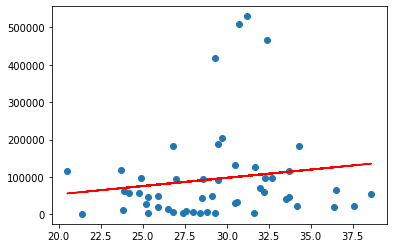

There is a weak positive correlation between depressive people and covid_cases in the state


In [88]:
st.linregress(depressive_df["Value"],depressive_df["positive"])

x_values = depressive_df["Value"]
y_values = depressive_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,40),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression(08/09/2020)")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#%matplotlib inline
print(f"There is a weak positive correlation between depressive people and covid_cases in the state")

The r-squared is: 0.029801189287644317


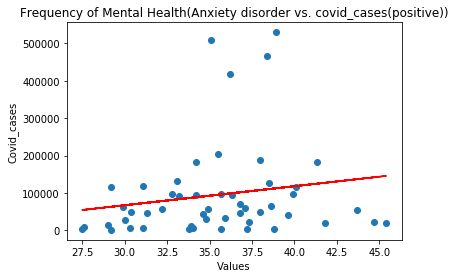

There is a moderate positive correlation between anxious people and covid_cases in the state


In [89]:
st.linregress(anxiety_df["Value"],anxiety_df["positive"])

x_values = anxiety_df["Value"]
y_values = anxiety_df["positive"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Values')
plt.ylabel('Covid_cases')
plt.title("Frequency of Mental Health(Anxiety disorder vs. covid_cases(positive))")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#%matplotlib inline
print(f"There is a moderate positive correlation between anxious people and covid_cases in the state")

The r-squared is: 0.03489830678449874


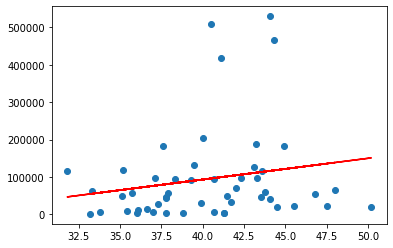

There is a moderate positive correlation between people suffering from either mental health generally and covid_cases in the state


In [90]:
st.linregress(dep_anx_df["Value"],dep_anx_df["positive"])

x_values = dep_anx_df["Value"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(10,40),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression(08/09/2020)")
plt.show()
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
#%matplotlib inline
print(f"There is a moderate positive correlation between people suffering from either mental health generally and covid_cases in the state")

